In [2]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, k3, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2) + k3 * (-x2 + (L1 + L2))) / m2]
    return f

In [3]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 1.0
k2 = 1.0
k3 = 1.0
# Natural lengths
L1 = 1.0
L2 = 1.0
# Friction coefficients
b1 = 0.0
b2 = 0.0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = 0.0
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 30.0
numpoints = 750

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, k3, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

for t1, w1 in zip(t, wsol): 
    print(t1, w1[0], w1[1], w1[2], w1[3], file=open("two_springs.dat", "a")) 

NameError: name 'FontProperties' is not defined

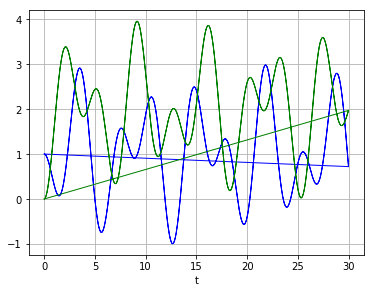

In [7]:
# Plot the solution that was generated

from numpy import loadtxt
import pylab
import matplotlib.pyplot as plt
t, x1, xy, x2, y2 = loadtxt('two_springs.dat', unpack=True)

plt.figure(1, figsize=(6, 4.5))

plt.xlabel('t')
plt.grid(True)
#hold(True)
lw = 1

plt.plot(t, x1, 'b', linewidth=lw)
plt.plot(t, x2, 'g', linewidth=lw)

plt.legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
plt.title('Mass Displacements for the\nCoupled Spring-Mass System')
plt.savefig('two_springs.png', dpi=100)